In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import pandas as pd

## Creating Pandas

In [9]:
# Using List of records (array of dictionaries)
list_of_dicts = [{'a':1,'b':2},{'a':2, 'b':4}] 
df = pd.DataFrame(list_of_dicts)
df

,a,b
0,1,2
1,2,4


In [10]:
# Using List of column values
a = [1,2]
b = [2,4]
df = pd.DataFrame({'a':a, 'b':b})
df

,a,b
0,1,2
1,2,4


## Create 3 series of data to compare with each other later

In [14]:
# Create 3 series of samples
num_samples = 3
class SeriesDescriptor:
    def __init__(self, name, lower, upper, num_samples):
        self.name = name
        self.lower = lower
        self.upper = upper
        self.num_samples = num_samples

my_series_descriptor_list = [
    SeriesDescriptor('a',3,8,num_samples), 
    SeriesDescriptor('b',4,9,num_samples), 
    SeriesDescriptor('c',2,5,num_samples)
]

def series_constructor(series_descriptor_list):
    names, att1s, att2s = [], [], []
    for sd in series_descriptor_list:
        names += [sd.name for i in range(sd.num_samples)]
        # Random number between sd.lower and sd.upper
        att1s += [np.round(np.random.uniform(sd.lower, sd.upper),3) for i in range(sd.num_samples)]
        # Another attribute showing use of some numpy capabilities (round, mean, array operations)
        att2s += [np.round(np.mean(np.array(att1s))*3,1) for i in range(sd.num_samples)]
    # Create Panda DataFrame with first two columns
    df = pd.DataFrame({'name': names, 'att1': att1s})
    # Insert another column (just to demonstrate how to do do)
    df['att2'] = att2s
    return df

df = series_constructor(my_series_descriptor_list)
# Inspect data frame
df

,name,att1,att2
0,a,3.440,13.3
1,a,3.175,13.3
2,a,6.675,13.3
3,b,7.104,18.3
4,b,7.566,18.3
5,b,8.564,18.3
6,c,4.012,15.9
7,c,4.380,15.9
8,c,2.887,15.9


In [15]:
# Write Data Frame to CSV
df.to_csv('randomSamples.csv', encoding='utf-8', index=False)

In [16]:
# Read Data Frame from CSV
df1 = pd.DataFrame(pd.read_csv('randomSamples.csv'))

In [22]:
# Rename column from att1 to attr1
df1.rename(columns = {'att1': 'attr1'}, inplace = True)

# Select desired columns (dropping att2)
df2 = df1[['name','attr1']]

# Remove 'name:c' samples
remove = False
if remove:
    df3 = df2[df2.name != 'c']
else:
    df3 = df2


# Group data frame by 'id' column
dfg = df3.groupby(df3.name)
keys = list(dfg.groups.keys())
print(keys)

['a', 'b', 'c']


In [23]:
# Show statistics for each queryName engineExecutionTimeInMillis
for key in keys:
    print("\n" + key)
    print(dfg.get_group(key)['attr1'].describe())


a
count    3.000000
mean     4.430000
std      1.948737
min      3.175000
25%      3.307500
50%      3.440000
75%      5.057500
max      6.675000
Name: attr1, dtype: float64

b
count    3.000000
mean     7.744667
std      0.746218
min      7.104000
25%      7.335000
50%      7.566000
75%      8.065000
max      8.564000
Name: attr1, dtype: float64

c
count    3.000000
mean     3.759667
std      0.777828
min      2.887000
25%      3.449500
50%      4.012000
75%      4.196000
max      4.380000
Name: attr1, dtype: float64


a         AxesSubplot(0.1,0.15;0.235294x0.75)
b    AxesSubplot(0.382353,0.15;0.235294x0.75)
c    AxesSubplot(0.664706,0.15;0.235294x0.75)
dtype: object

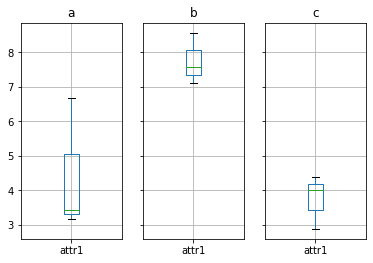

In [24]:
# Quick boxplot
dfg.boxplot(layout=(1,len(keys)))

name
a    [[AxesSubplot(0.125,0.670278;0.775x0.209722)],...
b    [[AxesSubplot(0.125,0.670278;0.775x0.209722)],...
c    [[AxesSubplot(0.125,0.670278;0.775x0.209722)],...
dtype: object

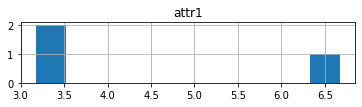

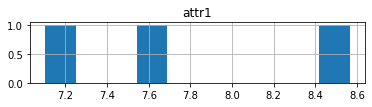

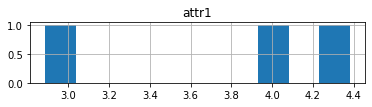

In [37]:
# Quick histogram
dfg.hist(layout=(len(keys),1))

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_ticklabels([])
ax.xaxis.set_visible(False)
plt.xlim(0, len(keys) + 1)
size = 6

x = 1 
for key in keys:
    serie = dfg.get_group(key)['attr1'].tolist()
    serie_jitter = [np.random.uniform(x-0.2,x+0.2) for i in serie]
    plt.scatter(serie_jitter, serie, label=key, s=size, alpha=0.7)
    x += 1
    
plt.legend(loc='upper right')
plt.title("Scatter plot with jitter")
plt.ylabel("Attr1", size=14)